In [24]:
import pandas as pd
from google.colab import drive

#Loading the data
drive.mount('/drive')
dataSet = pd.read_csv('/drive/MyDrive/data.csv')

# Showing basic statistical description of the data
print(dataSet.describe())


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [27]:
# Checking if the data has null values
dataSet.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [29]:
# Replacing the null values with the mean
dataSet.fillna(dataSet.mean(), inplace=True)
dataSet.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [30]:
# Aggregating the data using min, max, count, and mean
agg_dataSet = dataSet[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print(agg_dataSet)

         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [31]:
# Filtering the dataframe to select rows with calories between 500 and 1000
filtered_dataSet = dataSet[(dataSet['Calories'] >= 500) & (dataSet['Calories'] <= 1000)]
print(filtered_dataSet)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [32]:
# Filtering the dataframe to select rows with calories > 500 and pulse < 100
filtered_dataSet2 = dataSet[(dataSet['Calories'] > 500) & (dataSet['Pulse'] < 100)]
print(filtered_dataSet2)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [33]:
# Creating a new df_modified dataframe without Maxpulse column
dataSet_modified = dataSet.drop(columns=['Maxpulse'])

# Printing  the created new dataframe
print(dataSet_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [34]:
# Deleting Maxpulse column from the main dataframe
dataSet.drop(columns=['Maxpulse'], inplace=True)
print(dataSet)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [37]:
# Converting datatype of Calories column to int
dataSet['Calories'] = dataSet['Calories'].astype(int)
dataSet.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Duration', ylabel='Calories'>

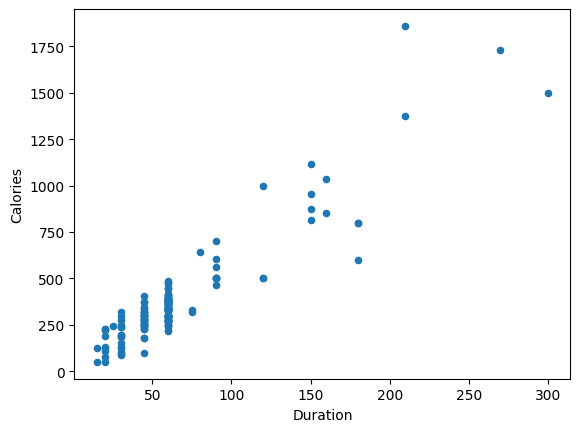

In [38]:
# Creating scatter plot of Duration and Calories columns
dataSet.plot.scatter(x='Duration', y='Calories')

Correlation between "survived" and "sex": -0.5433513806577555


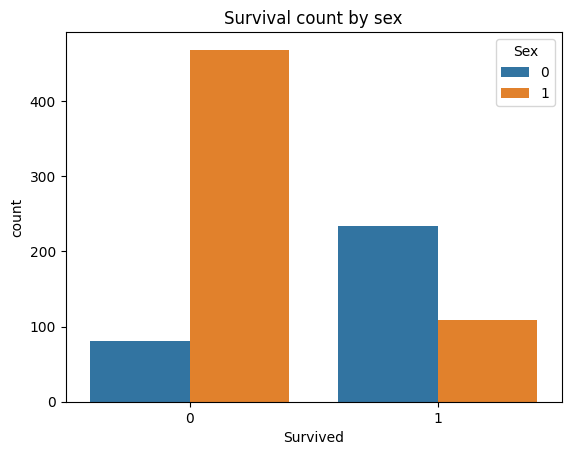

Text(0.5, 1.0, 'Survival rate by sex')

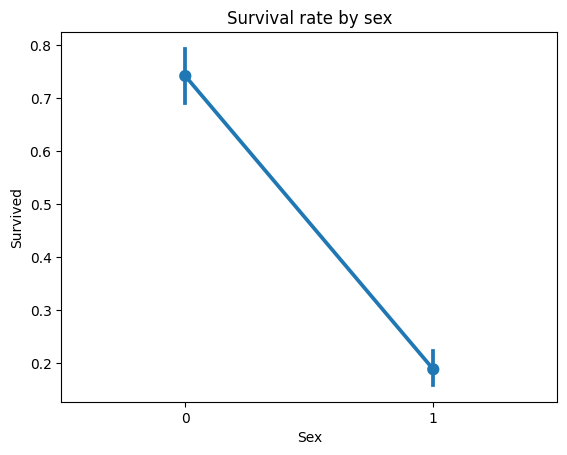

In [39]:
#Titanic DataSet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
titanic = pd.read_csv('/drive/MyDrive/train.csv')

#Converting Sex type
titanic['Sex'] = titanic['Sex'].replace(["female", "male"], [0, 1])

# Finding the correlation between 'survived' and 'sex'
corr = titanic['Survived'].corr(titanic['Sex'])

# Printing the correlation coefficient
print('Correlation between "survived" and "sex":', corr)

#Count plot showing the survival count by sex
sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.title('Survival count by sex')
plt.show()

# Point plot showing the survival rate by sex
sns.pointplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival rate by sex')


In [19]:
# Implementing the Naive's Bayes
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Titanic dataset
titanic = pd.read_csv('/drive/MyDrive/train.csv')

# Prepare data
X = titanic[['Sex', 'Age']]
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  # Convert 'sex' to binary
X = X.fillna(X.mean())  # Replace missing values with mean
y = titanic['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on testing set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7910447761194029


<ipython-input-19-7779b59f36af>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})  # Convert 'sex' to binary


In [20]:
#Glass DataSet
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Load the glass dataset using pandas
glass = pd.read_csv("/drive/MyDrive/glass.csv")

# Extract the features and target variable
X = glass.drop("Type", axis=1).values
y = glass["Type"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
clf_nb = GaussianNB()

# Train the classifier on the training data
clf_nb.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred_nb = clf_nb.predict(X_test)

# Evaluate the classifier's performance on the testing data
score_nb = clf_nb.score(X_test, y_test)
print("Naive Bayes Accuracy:", score_nb)

report_nb = classification_report(y_test, y_pred_nb)
print(report_nb)

# Create a linear SVM classifier
clf_svm = LinearSVC()

# Train the classifier on the training data
clf_svm.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred_svm = clf_svm.predict(X_test)

# Evaluate the classifier's performance on the testing data
score_svm = clf_svm.score(X_test, y_test)
print("Linear SVM Accuracy:", score_svm)

report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)

Naive Bayes Accuracy: 0.5581395348837209
              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43

Linear SVM Accuracy: 0.4186046511627907
              precision    recall  f1-score   support

           1       0.60      0.82      0.69        11
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           5       0.18      1.00      0.31         4
           6       0.00      0.00      0.00         3
           7       0.83      0.62      0.71        

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

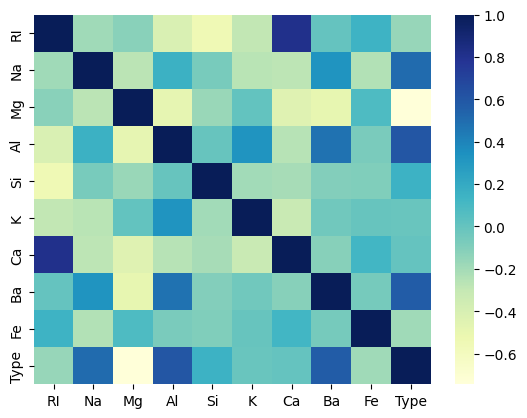

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = glass.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

plt.show()

corr_matrix.style.background_gradient(cmap="Greens")
